**Visualization**

In [10]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [11]:
Data=(r"D:\Semester Four\Machine Learning\Assignments\Face-Recognition-using-PCA-LDA\Data")
paths = [os.path.join(Data, "s" + str(i)) for i in range(1, 41)]
cnt = 0
Data = np.zeros((400, 10304))
labels = np.zeros((400, 1))
for i in range(40):
    labels[i * 10 : (i + 1) * 10] = i + 1
for path in paths:
    files = os.listdir(path)
    for file in files:
        img = Image.open(path + "/" + file)
        np_img = np.array(img)
        np_img = np_img.flatten()
        Data[cnt] = np_img
        cnt += 1

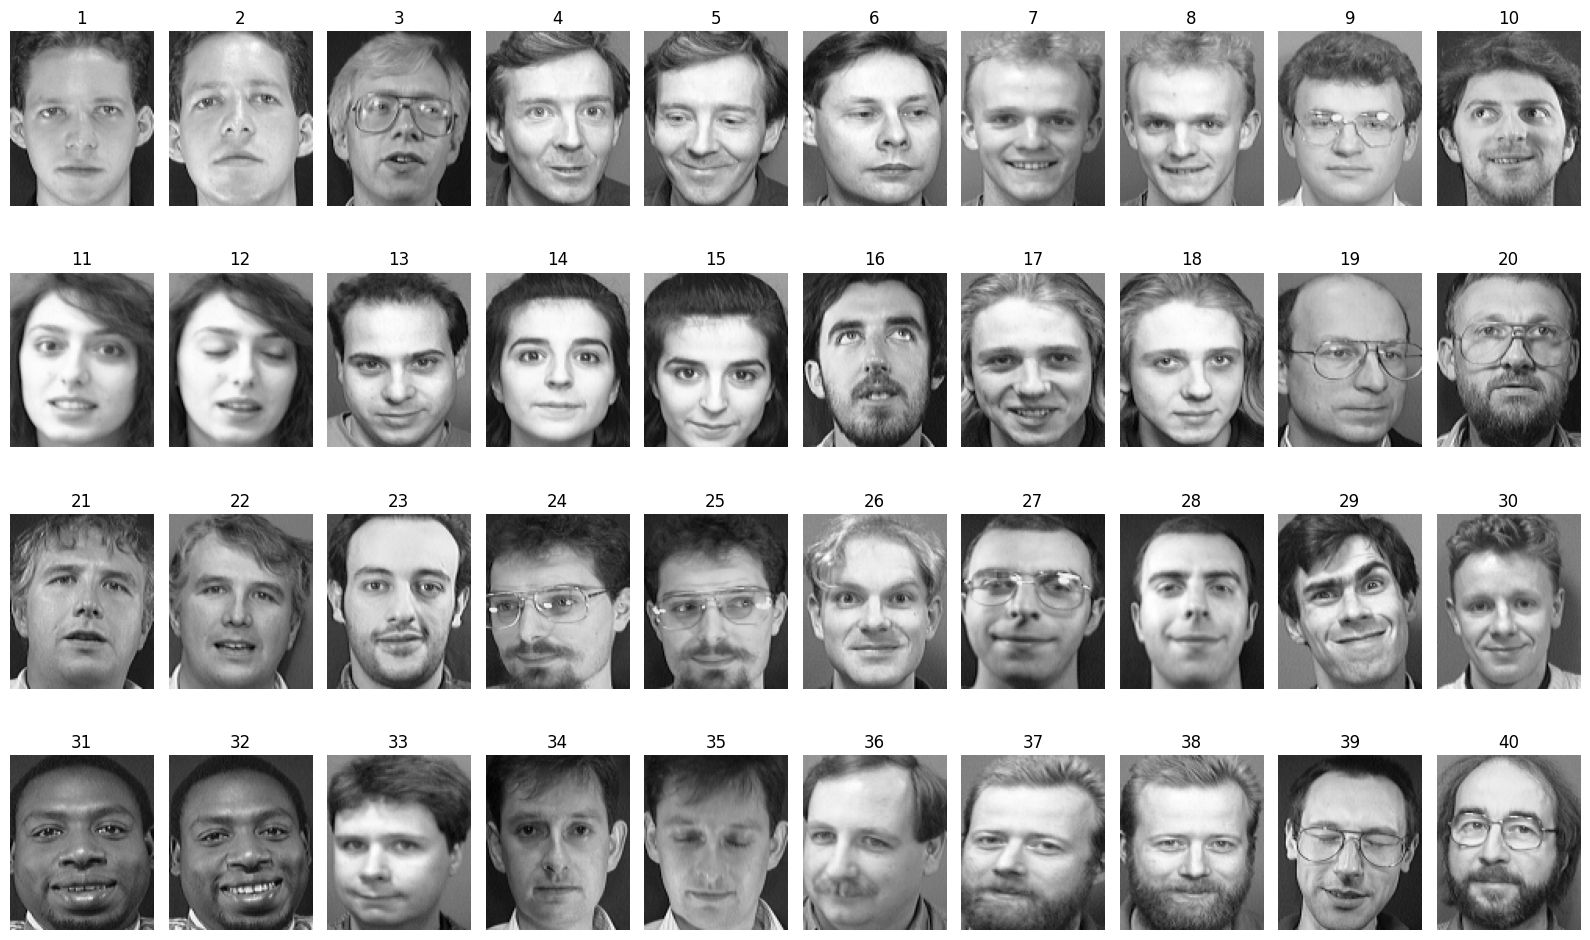

In [12]:
image_height = 112
image_width = 92

fig, axs = plt.subplots(4, 10, figsize=(16, 10))

# Flatten the array of axes
axs = axs.ravel()

for i in range(40):
    image_array = np.reshape(Data[(i) * 7], (image_height, image_width))
    axs[i].imshow(image_array, cmap="gray")
    axs[i].set_title(i + 1)
    axs[i].axis("off")

plt.tight_layout()
plt.show()

In [13]:
X_train = Data[0::2]
X_test = Data[1::2]
y_train = labels[0::2]
y_test = labels[1::2]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(200, 10304)
(200, 10304)
(200, 1)
(200, 1)


**PCA**

In [14]:
import numpy as np
#Principal Component Analysis
def PCA(training_DataMatrix, alpha):
    # Step 1: Compute the mean
    mean = np.mean(training_DataMatrix, axis=0)
    
    # Step 2: Center the data (m)
    training_data_centralized = training_DataMatrix - meanc
    
    # Step 3: Compute the covariance matrix
    cov_matrix = training_data_centralized @ training_data_centralized.T
    
    # Step 4: Compute the eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    
    # Step 5: Sort the eigenvectors descendingly by eigenvalues
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    
    # Step 6: Compute the cumulative explained variance ratio
    explained_variance_ratio = np.cumsum(eigenvalues) / np.sum(eigenvalues)
    
    # Step 7: Determine the number of components to keep
    no_components = np.argmax(explained_variance_ratio >= alpha) + 1
    
    # Step 8: Reduce the basis
    eigenvectors_converted = training_data_centralized.T @ eigenvectors
    eigenfaces = eigenvectors_converted / np.linalg.norm(eigenvectors_converted, axis=0)
    
    # Step 9: Reduce the dimensionality of the data
    projected_data = training_data_centralized @ eigenfaces[:, :no_components]
    
    return mean, eigenfaces[:, :no_components], projected_data

Label vector shape: (400,)
Data Matrix shape: (400, 10304)
Data Matrix shape:: (400, 10304)
Label vector shape: (400,)

Training set shapes:
X_train shape: (200, 10304)
y_train shape: (200,)

Test set shapes:
X_test shape: (200, 10304)
y_test shape: (200,)

Accuracy for every value of alpha and k:
Alpha: 0.8, K: 1, Accuracy: 95.00%


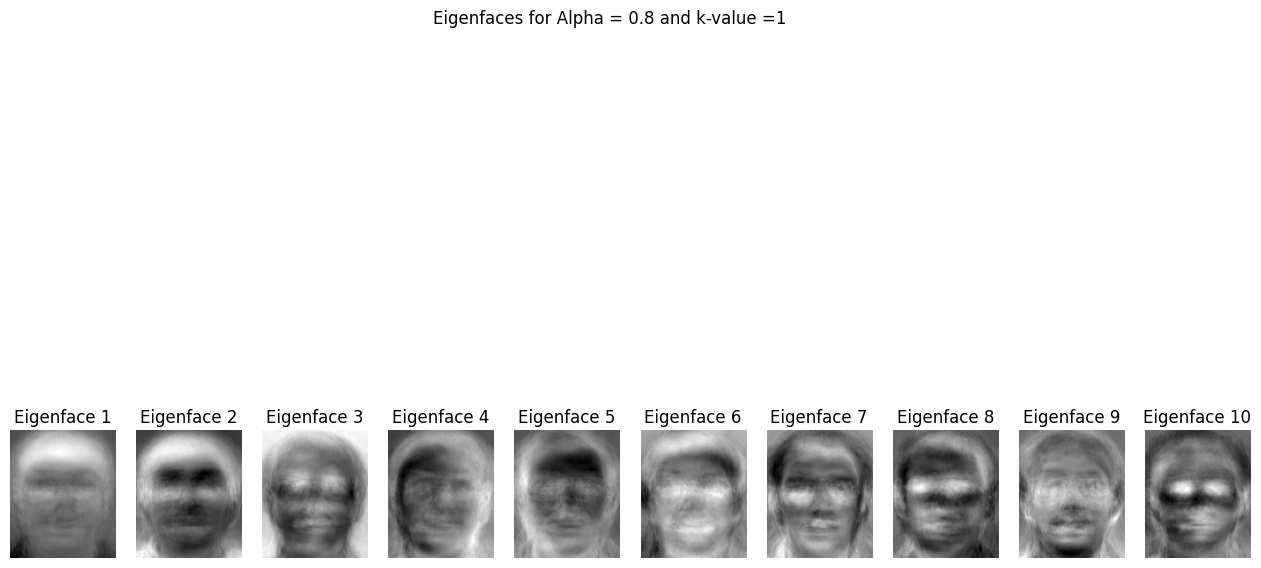

Alpha: 0.8, K: 3, Accuracy: 89.50%


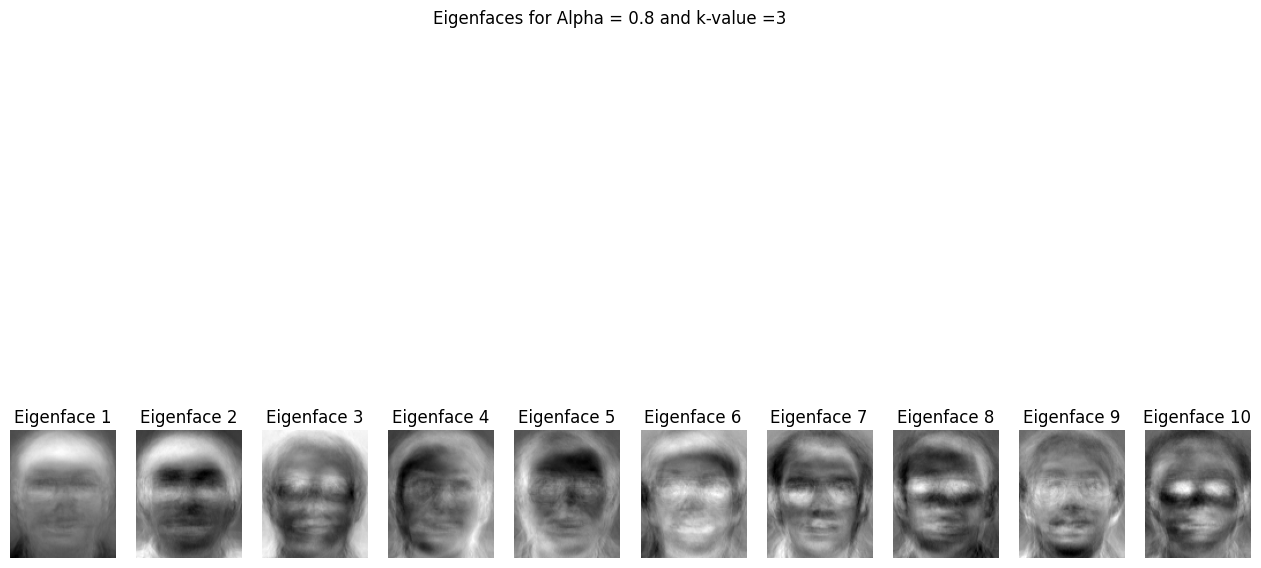

Alpha: 0.8, K: 5, Accuracy: 85.00%


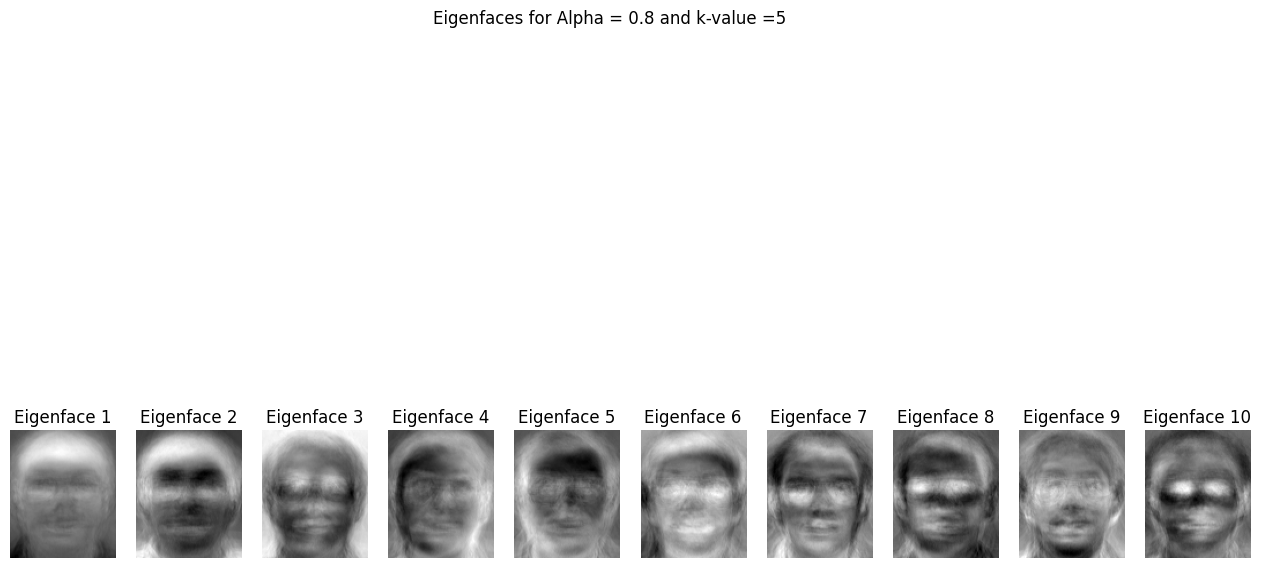

Alpha: 0.8, K: 7, Accuracy: 80.50%


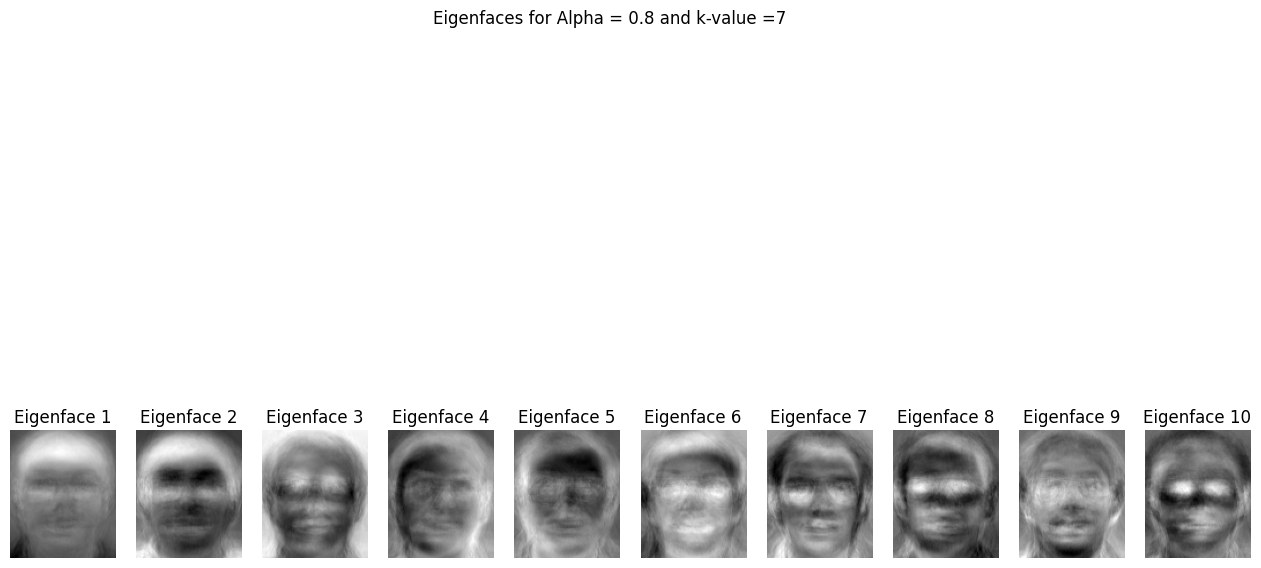

Alpha: 0.85, K: 1, Accuracy: 95.00%


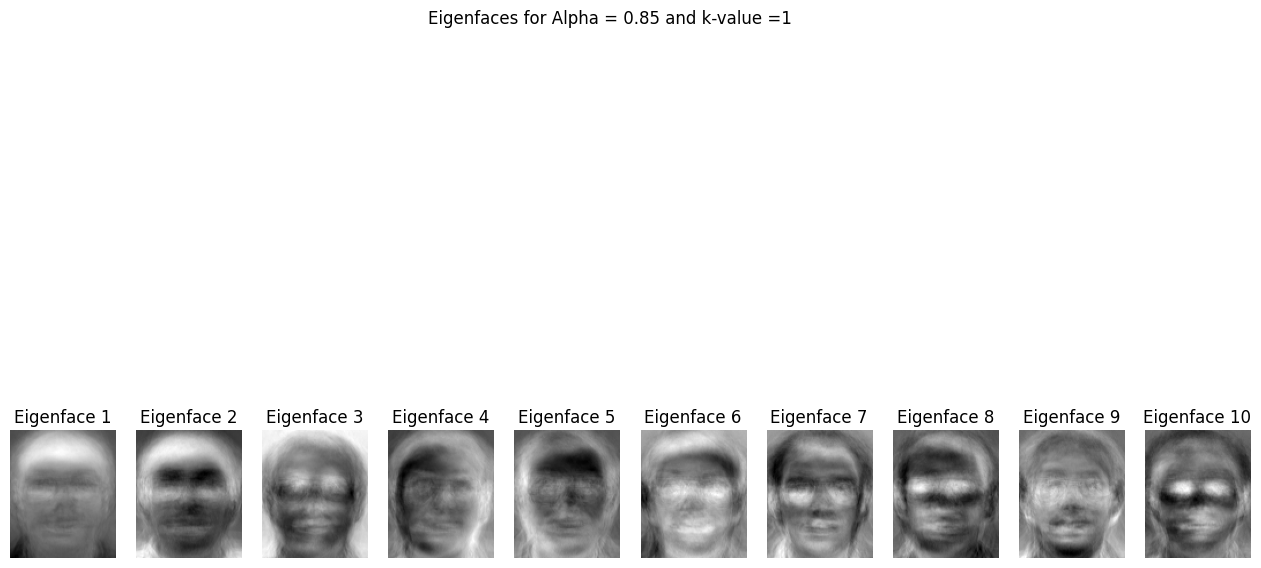

Alpha: 0.85, K: 3, Accuracy: 89.50%


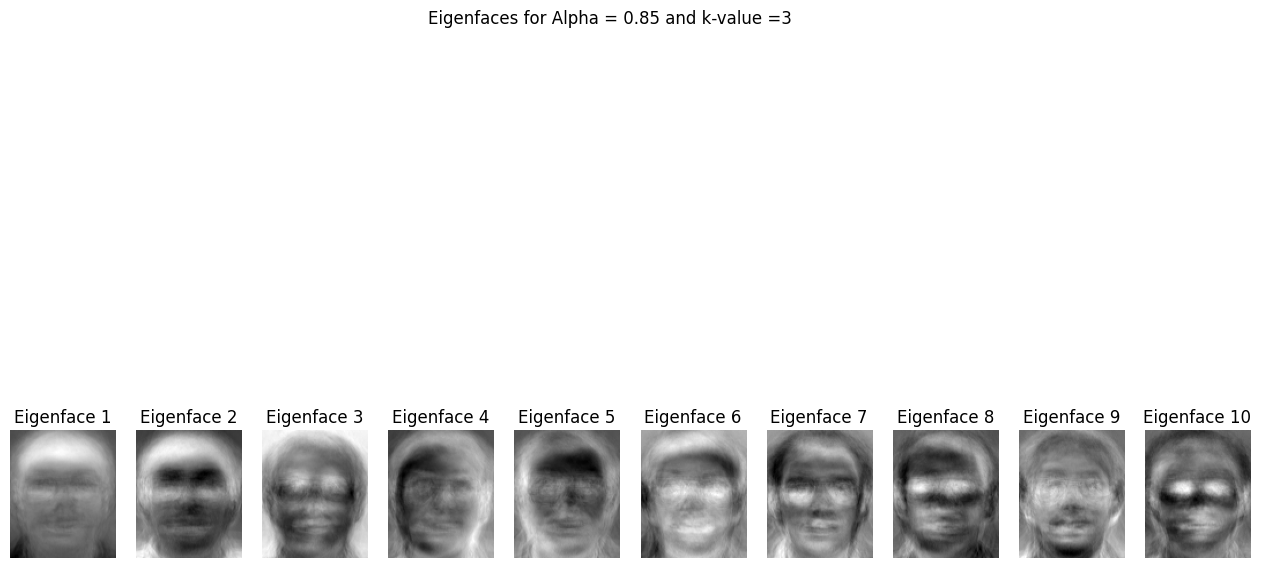

Alpha: 0.85, K: 5, Accuracy: 84.50%


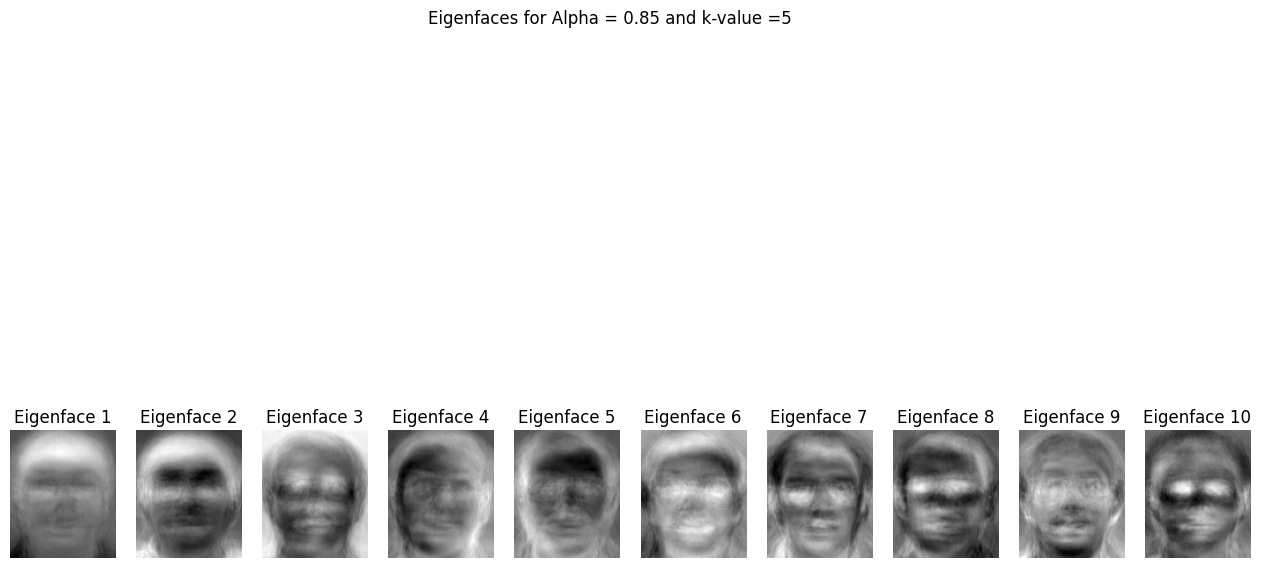

Alpha: 0.85, K: 7, Accuracy: 77.50%


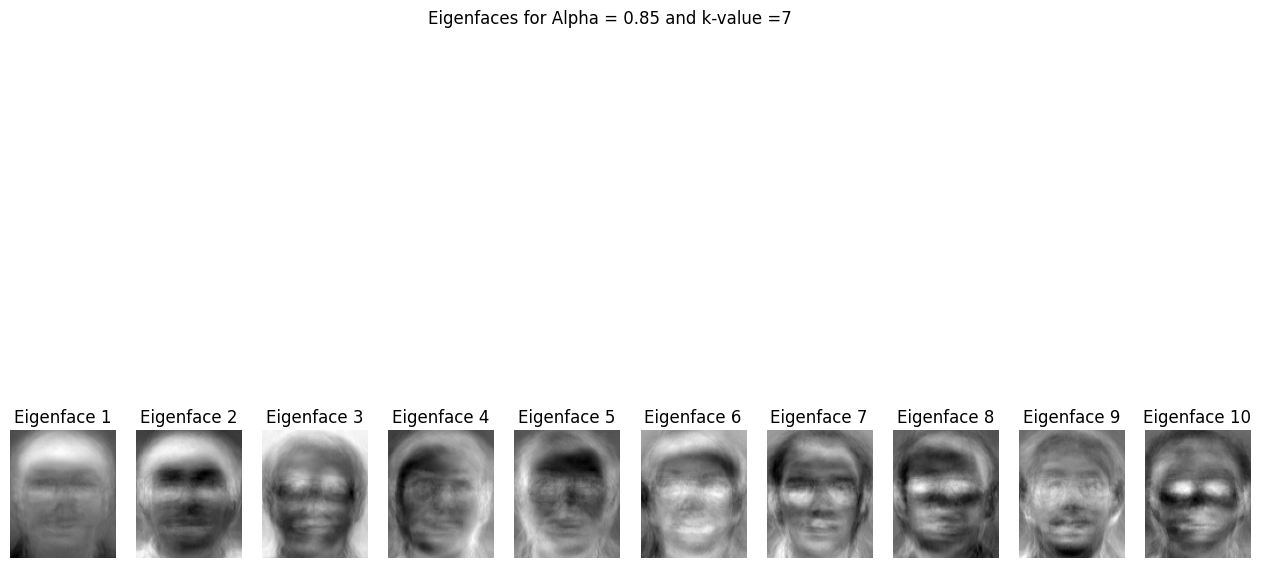

Alpha: 0.9, K: 1, Accuracy: 94.00%


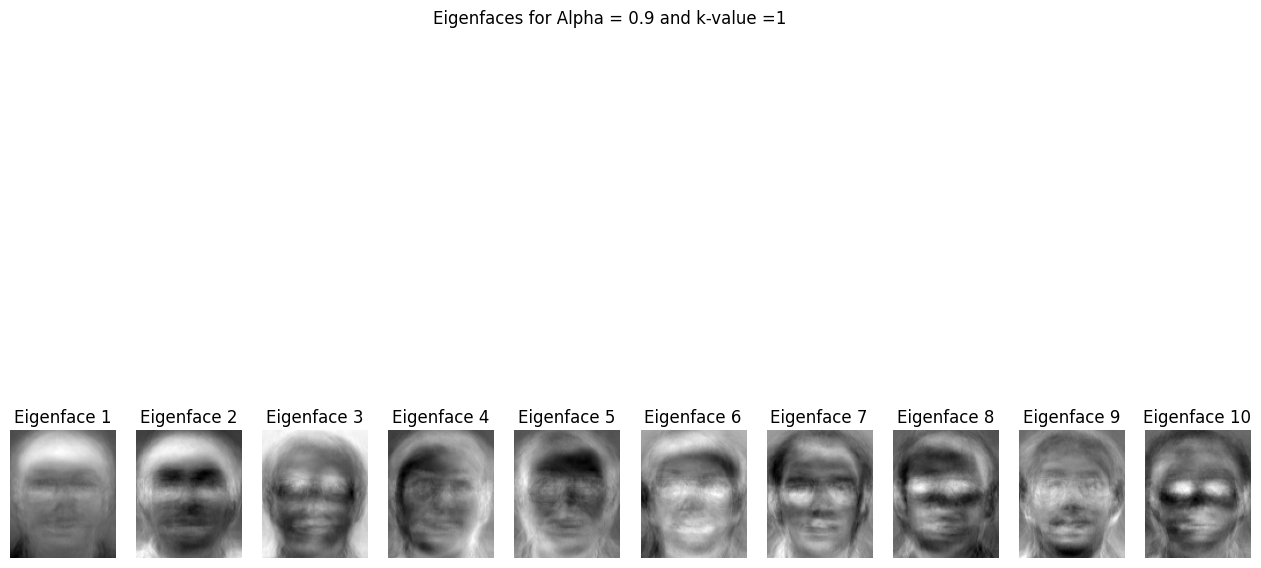

Alpha: 0.9, K: 3, Accuracy: 89.00%


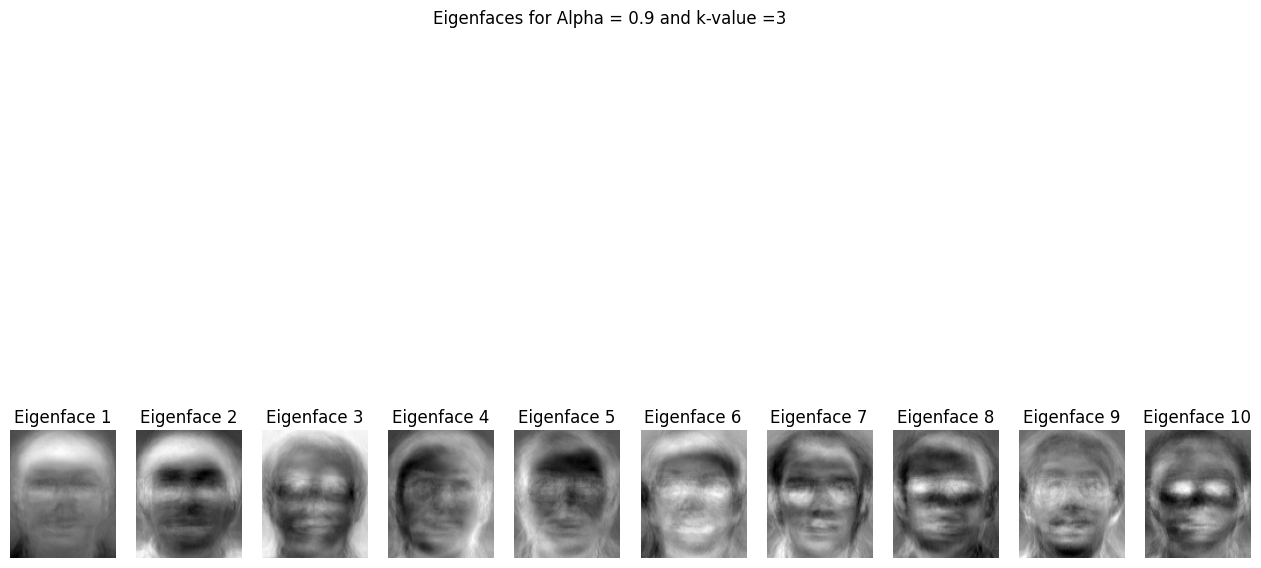

Alpha: 0.9, K: 5, Accuracy: 83.50%


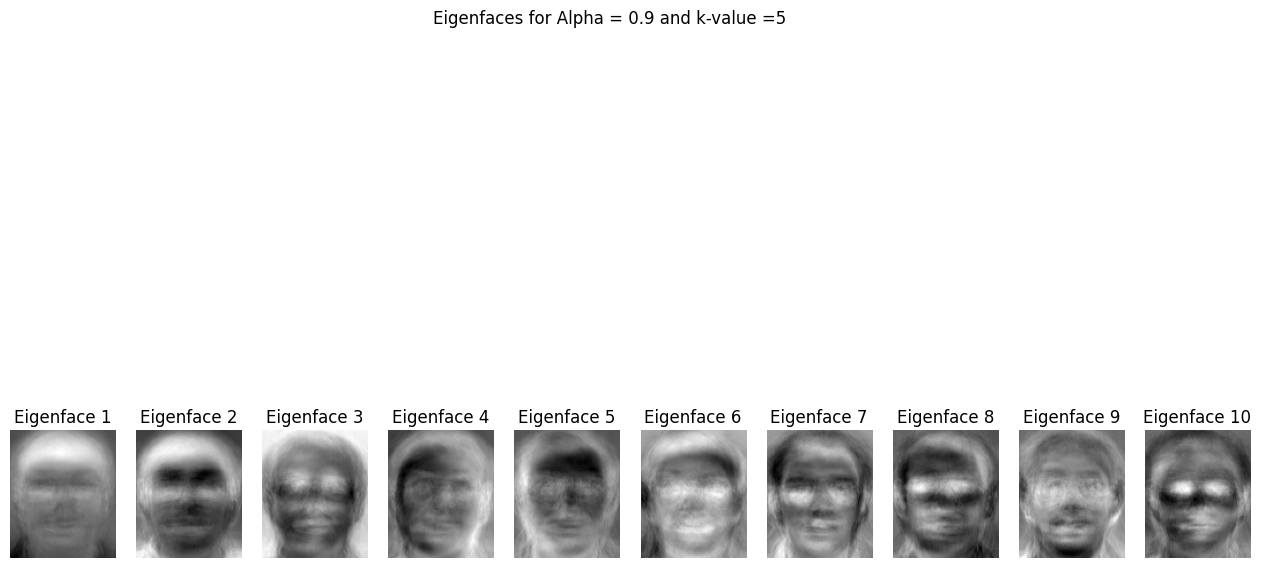

Alpha: 0.9, K: 7, Accuracy: 77.00%


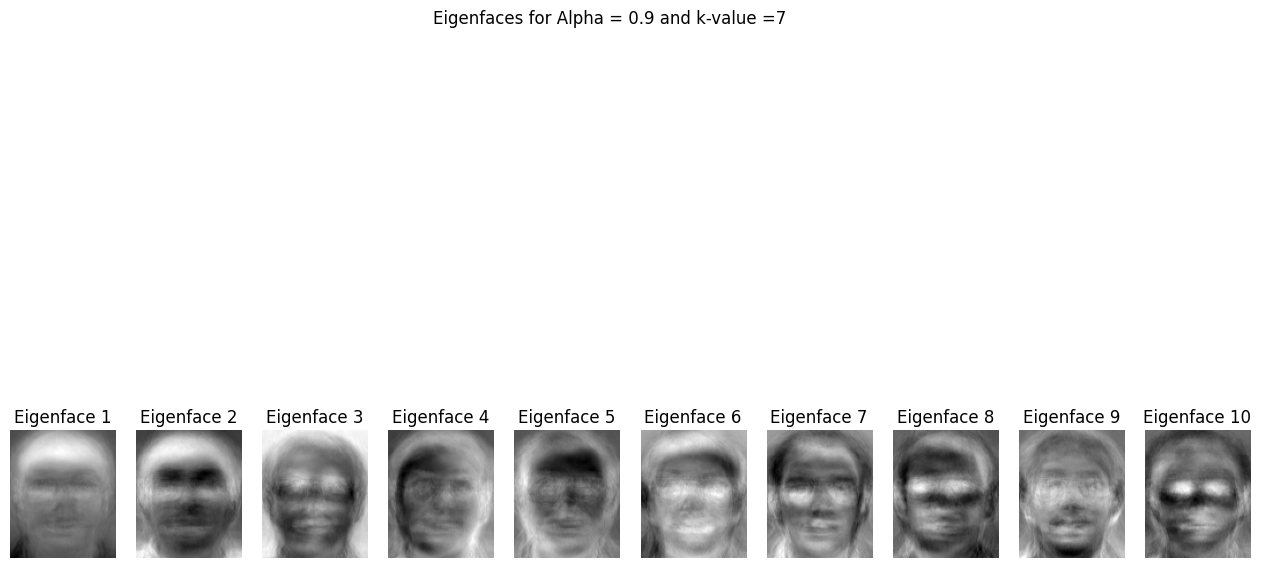

Alpha: 0.95, K: 1, Accuracy: 94.00%


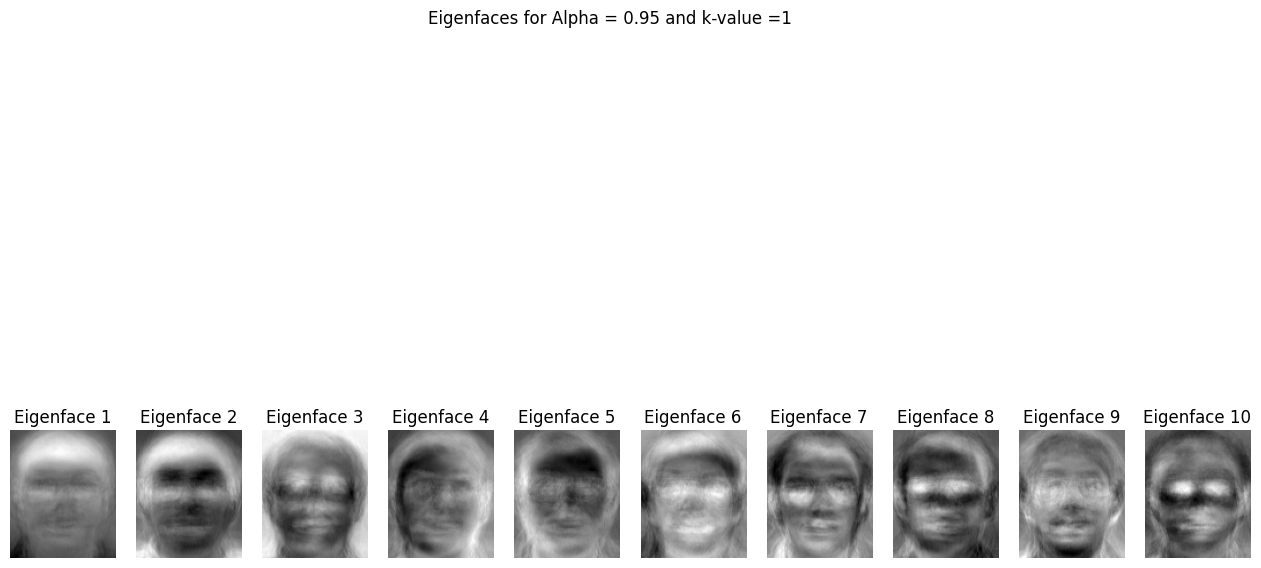

Alpha: 0.95, K: 3, Accuracy: 89.50%


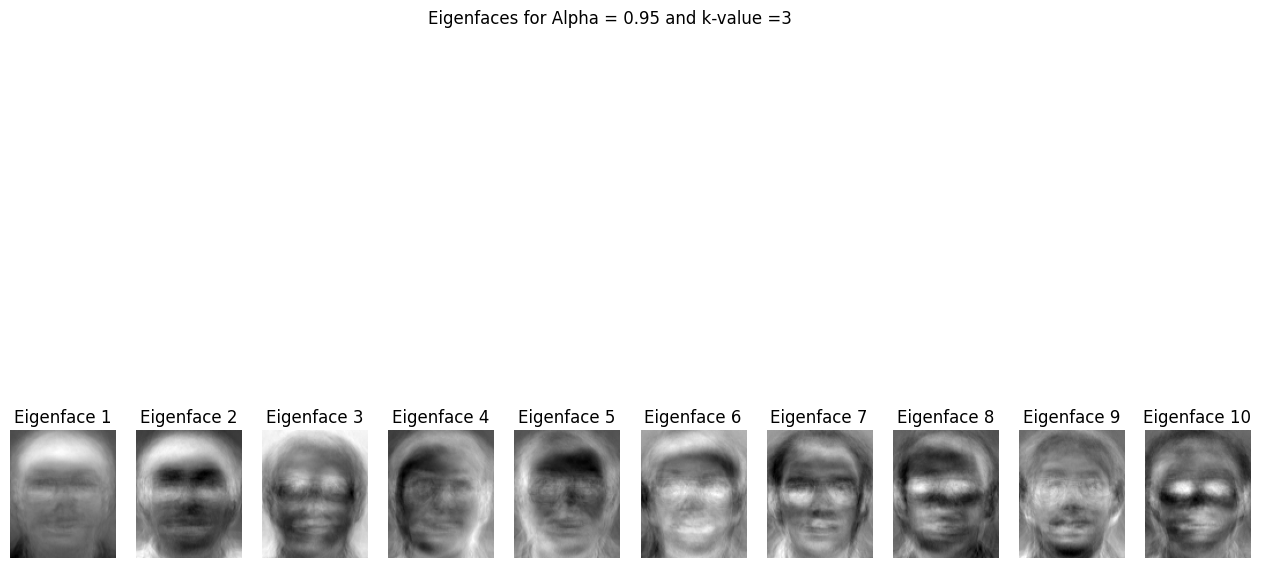

Alpha: 0.95, K: 5, Accuracy: 84.50%


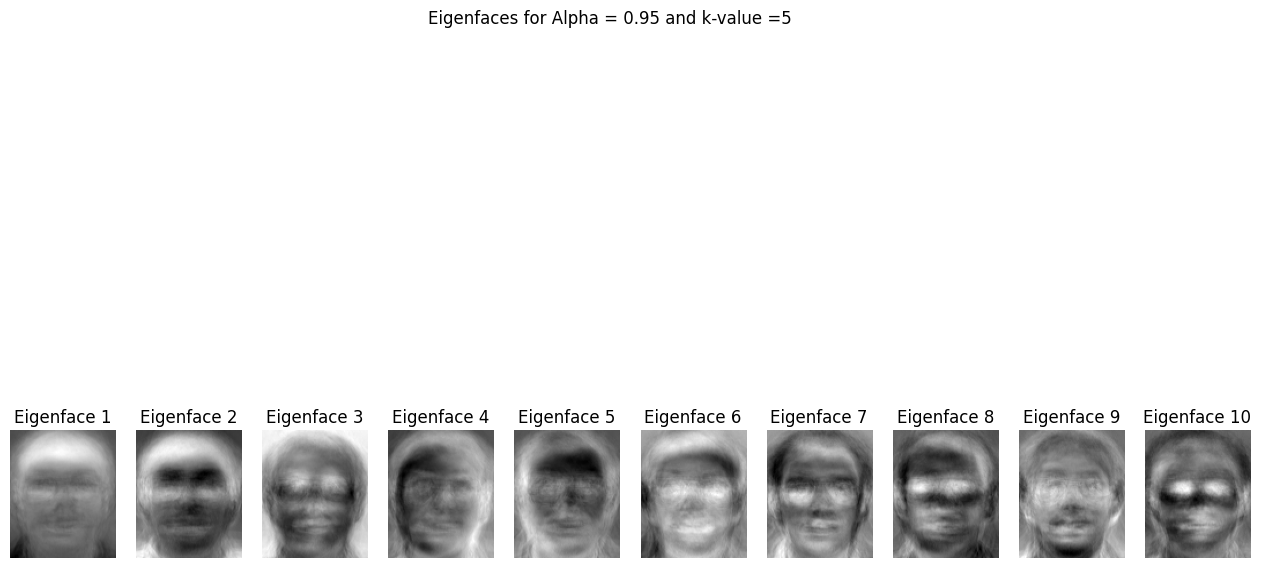

Alpha: 0.95, K: 7, Accuracy: 74.00%


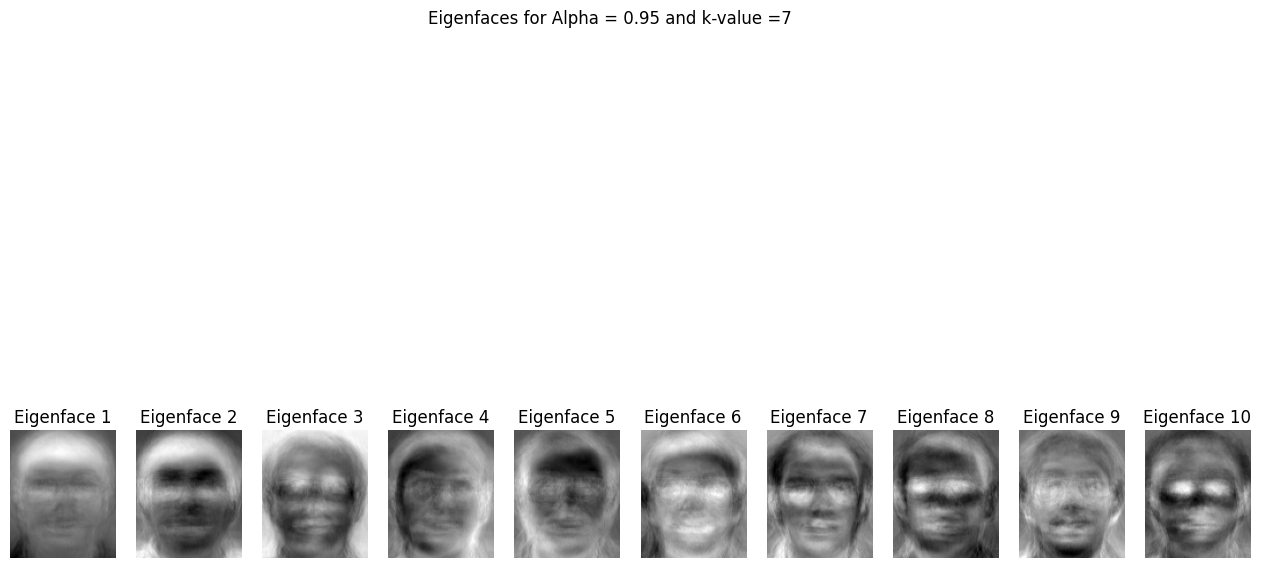

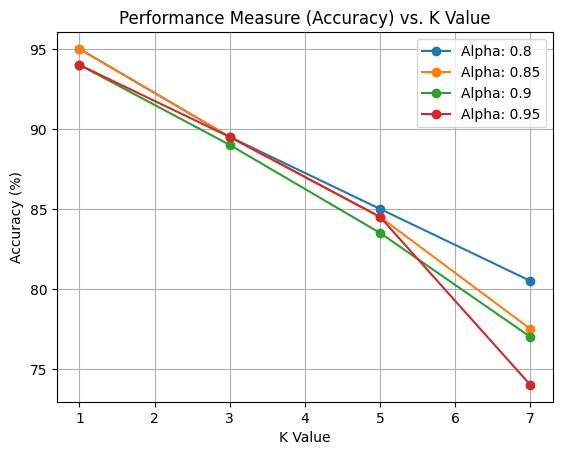

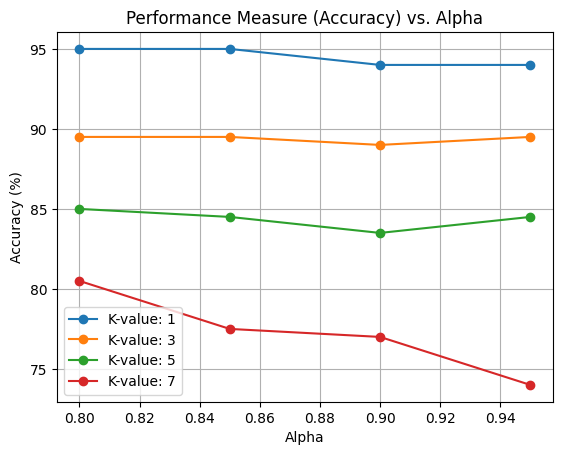

In [15]:
import numpy as np
#from PIL import Image
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from data_preprocessing import process
from pca import PCA

#PCA (Without Tuning)
'''
print("\nAccuracy for every value of alpha :")
# Define the alpha values (from the assig.PDF)
alpha_values = [0.8, 0.85, 0.9, 0.95]

# Store accuracy for each alpha
accuracies = []

# Perform PCA and classify for each alpha value
for alpha in alpha_values:
    # Perform PCA on the training set
    mean_face, eigenfaces, projected_data = PCA(X_train, alpha)
    
    # Project the training and test sets separately
    projected_train = (X_train - mean_face) @ eigenfaces
    projected_test = (X_test - mean_face) @ eigenfaces
    
    # Use a simple classifier (K-Nearest Neighbors) to determine the class labels
    classifier = KNeighborsClassifier(n_neighbors=1)
    classifier.fit(projected_train, y_train)
    y_pred = classifier.predict(projected_test)
    
    # Calculate accuracy for this alpha
    accuracy = np.mean(y_pred == y_test) * 100
    accuracies.append(accuracy)
    # Report accuracy for this alpha
    print(f"Alpha: {alpha}, Accuracy: {accuracy:.2f}%")
    print(eigenfaces.shape)
    
    # Plot the first 10 eigenfaces for this alpha
    fig, axs = plt.subplots(1, 10, figsize=(16, 10))
    for i in range(10):
        image_array = np.reshape(eigenfaces[:, i], (112, 92))
        axs[i].imshow(image_array, cmap="gray")
        axs[i].set_title("Eigenface " + str(i + 1))
        axs[i].axis("off")
    plt.suptitle(f"Eigenfaces for Alpha = {alpha}")
    plt.show()
    
# Plot alpha values against classification accuracy
plt.plot(alpha_values, accuracies, marker='o')
plt.title('Relation between Alpha and Classification Accuracy')
plt.xlabel('Alpha')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.show()

'''

X_train, y_train, X_test, y_test = process()
#PCA (With Tuning)
# Perform PCA and classify for each alpha value
print("\nAccuracy for every value of alpha and k:")
alpha_values = [0.8, 0.85, 0.9, 0.95]
k_values = [1, 3, 5, 7]
accuracies = []

for alpha in alpha_values:
    mean_face, eigenfaces, projected_data = PCA(X_train, alpha)
    projected_train = (X_train - mean_face) @ eigenfaces
    projected_test = (X_test - mean_face) @ eigenfaces
    
    for k in k_values:
        classifier = KNeighborsClassifier(n_neighbors=k)
        classifier.fit(projected_train, y_train)
        y_pred = classifier.predict(projected_test)
        accuracy = np.mean(y_pred == y_test) * 100
        accuracies.append(accuracy)
        print(f"Alpha: {alpha}, K: {k}, Accuracy: {accuracy:.2f}%")
        # Plot the first 10 eigenfaces for this alpha
        fig, axs = plt.subplots(1, 10, figsize=(16, 10))
        for i in range(10):
             image_array = np.reshape(eigenfaces[:, i], (112, 92))
             axs[i].imshow(image_array, cmap="gray")
             axs[i].set_title("Eigenface " + str(i + 1))
             axs[i].axis("off")
        plt.suptitle(f"Eigenfaces for Alpha = {alpha} and k-value ={k}")
        plt.show()

# Reshape accuracies into a 2D array for easier plotting
''' 
to iterate it easily for each k[i] take row[i]
[[95.  89.5 85.  80.5]
 [95.  89.5 84.5 77.5]
 [94.  89.  83.5 77. ]
 [94.  89.5 84.5 74. ]]
'''
accuracies = np.array(accuracies).reshape(len(alpha_values), len(k_values))

# Plot the performance measure (accuracy) against K value for each alpha
for i, alpha in enumerate(alpha_values):
    plt.plot(k_values, accuracies[i], marker='o', label=f"Alpha: {alpha}")
plt.title("Performance Measure (Accuracy) vs. K Value")
plt.xlabel("K Value")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid(True)
plt.show()

# It's the same plot but this mesure the performance (accuracy) against alpha for each K value
for i, k in enumerate(k_values):
    plt.plot(alpha_values, accuracies[:, i], marker='o', label=f"K-value: {k}")
plt.title("Performance Measure (Accuracy) vs. Alpha")
plt.xlabel("Alpha")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid(True)
plt.show()

**LDA**

In [16]:
import numpy as np

"""

     class_means
     For Each Class I Will Compute Its Mean
     Example:
         The First Class (Class A)
         ClassA Contains 10 Images (Each Image Represent A Vector Of 10304 Value)
         n = 10304
         Image1 Image2 Image3 ................. Image 10
            1     1      1                         1
            2     2      2                         2
            3     3      3                         3
            .     .      .                         .
            .     .      .                         .
            .     .      .                         .
            n     n      n                         n
        So Let's Compute Mean For Each Label
        x1Bar = sum(x1)/n 
        x2Bar = sum(x2)/n
        .
        .
        .
        x10304Bar = sum(x10304)/n
        
        classA Vector 
        [ sum(x1)/n   ]
        [ sum(x2)/n   ]
        [    ..       ]
        [    ..       ]
        [    ..       ]
        [    ..       ]
        [sum(x10304)/n]
"""
"""
Goal: 
The projected matrix obtained from LDA represents
a transformation of the original data into a lower-dimensional 
subspace that maximizes the separation between classes.

the scatter between classes is maximized while the scatter within classes is minimized

"""

"""
class_means = np.array([np.mean(X_train[y_train == i], axis=0) for i in range(1, 41)])

This Line Of Code Equivalent To This Code (Just For Simplicity)

def calculate_mean_vector(training_data , labels):
      classes = np.unique(labels)
      class_means = np.zeros((len(classes), training_data.shape[1]))
      for i, class_label in enumerate(classes):
        class_means[i] = np.mean(training_data[labels == class_label], axis=0) # axis=0 To Sum Row By Row
      return class_means
"""
def LDA(X_train, y_train):
    y_train = np.squeeze(y_train)
    class_means = np.array([np.mean(X_train[y_train == i], axis=0) for i in range(1, 41)])
    class_sizes = np.array([np.sum(y_train == i) for i in range(1, 41)])

    # Compute overall mean
    # We Need To Compute Overall Mean To 
    # Centering the Data (class_means[i(current_class) - 1(because it 0 index)] - overall_mean)
    # Centering The Data Helping For Removing Any Bias Or Shift In The Data Distribution
    overall_mean = np.mean(X_train, axis=0)

    # Compute within-class scatter matrix
    # Make A Zero Matrix Of (Num Of Features * 2) = S_W
    # Calculate The Covaraince Of Each Class 
    # Sum All The Covariances = S_W
    S_W = np.zeros((X_train.shape[1], X_train.shape[1]))
    for i in range(1, 41):
        # Use boolean index to select rows from X_train
        class_data = X_train[y_train == i]
        centered_data = class_data - class_means[i - 1]
        S_W += np.dot(centered_data.T, centered_data) 

    # Regularize S_W
    S_W += 1e-7 * np.identity(X_train.shape[1])

    # Compute between-class scatter matrix
    
    S_B = np.zeros((X_train.shape[1], X_train.shape[1]))
    for i in range(1, 41):
        # Use boolean index to select rows from X_train
        # Select All Vector Images In The Current Class
        class_data = X_train[y_train == i]
        # Subtracted From Overall_mean
        class_diff = class_means[i - 1] - overall_mean
        S_B += class_sizes[i - 1] * np.outer(class_diff, class_diff)

    # Solve generalized eigenvalue problem
    eigenvalues, eigenvectors = np.linalg.eig(np.dot(np.linalg.inv(S_W), S_B))

    # Sort Eigenvectors Based On Sorted Eigenvalues
    idx = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, idx]

    # Take Only The First39 Dominant eigenvectors [In The PDF He Want The First Dominant Eigenvectors]
    projection_matrix = sorted_eigenvectors[:, :39]
    return np.real(projection_matrix)

# Split The projected_data Data Into Training And Testing Data
# We Need To Split The Data To Training And Testing Data To Test It Using (1NN)
def LDA_projected_data(training_data,test_data,projection_matrix):
    projected_X_train = np.dot(training_data, projection_matrix)
    projected_X_test = np.dot(test_data, projection_matrix)
    return projected_X_train, projected_X_test

def LDA2 (train_data, train_labels, k=1):
    # mean of each class
    mean1 = np.mean(train_data[train_labels.ravel() == 1], axis=0)
    mean0 = np.mean(train_data[train_labels.ravel() == 0], axis=0)

    # within class scatter matrix
    Sw = np.dot((train_data[train_labels.ravel() == 1] - mean1).T, 
                (train_data[train_labels.ravel() == 1] - mean1)) + np.dot((train_data[train_labels.ravel() == 0] - mean0).T, 
                                                                          (train_data[train_labels.ravel() == 0] - mean0))
    # between class scatter matrix
    Sb = np.dot((mean1 - mean0).reshape(-1,1), (mean1 - mean0).reshape(-1,1).T)

    # calculate eigenvalues and eigenvectors
    eig_values, eig_vectors = np.linalg.eigh(np.dot(np.linalg.inv(Sw), Sb))
    eig_values = np.real( eig_values)
    eig_vectors = np.real( eig_vectors)
    idx = np.argsort(eig_values)[::-1]
    eig_values = eig_values[idx]
    eig_vectors = eig_vectors[:,idx]
    return eig_vectors[:,:k]



In [1]:
from lda import LDA, LDA_projected_data
from data_preprocessing import process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd


# Test The Accuracy Of LDA Using The First Nearest Neighbor (1NN)
def Test_LDA(k , LDA_projection_matrix):
    projected_X_train, projected_X_test = LDA_projected_data(X_train,X_test,LDA_projection_matrix)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(projected_X_train, y_train.ravel())
    y_pred = knn.predict(projected_X_test)
    accuracy = accuracy_score(y_test, y_pred.ravel())
    return accuracy





X_train, y_train, X_test, y_test = process()
LDA_projection_matrix = LDA(X_train,y_train)
print(LDA_projection_matrix.shape)
print("LDA Accuracy: " + str(Test_LDA(1 , LDA_projection_matrix))) # ====> 0.965

LDA_projection_matrix = LDA(X_train,y_train)
print(LDA_projection_matrix.shape)
print(LDA_projection_matrix)
print("LDA Accuracy: " + str(Test_LDA(1 , LDA_projection_matrix))) # ====> 0.965

# LDA With Tunning 
k_values = [1, 3, 5, 7, 9] # HyperParameters

# Initialize a list to store the results
results = []
projected_X_train, projected_X_test = LDA_projected_data(X_train,X_test,LDA_projection_matrix)
# Loop over the values of k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights="distance")
    knn.fit(projected_X_train, y_train.ravel())
    y_pred = knn.predict(projected_X_test)
    accuracy = accuracy_score(y_test, y_pred.ravel())
    results.append({"accuracy": accuracy})

# Convert the results to a DataFrame
df = pd.DataFrame(results, index=k_values)
df.index.name = "k"
print(df)

# So Tuning Is Not Important In This Case

Label vector shape: (400,)
Data Matrix shape: (400, 10304)
Data Matrix shape:: (400, 10304)
Label vector shape: (400,)

Training set shapes:
X_train shape: (200, 10304)
y_train shape: (200,)

Test set shapes:
X_test shape: (200, 10304)
y_test shape: (200,)
(10304, 39)
LDA Accuracy: 0.965
(10304, 39)
[[-0.0014208  -0.01417637 -0.02433686 ... -0.00617335 -0.00965163
  -0.00951183]
 [-0.00030006 -0.01455088 -0.02216832 ... -0.00441819 -0.01061496
  -0.00945724]
 [-0.00351518 -0.01515462 -0.02058498 ... -0.00509533 -0.01021224
  -0.00863365]
 ...
 [ 0.01749198  0.03195385 -0.01439475 ... -0.00080977 -0.0024763
   0.00843632]
 [ 0.02884911  0.01989878 -0.01241046 ...  0.00042005  0.0131866
   0.01434481]
 [ 0.0253907   0.01906158 -0.01507016 ...  0.00080004  0.01470412
   0.01864693]]
LDA Accuracy: 0.965
   accuracy
k          
1     0.965
3     0.965
5     0.965
7     0.965
9     0.965


**Bonus (Face and No Face)**

Faces=  (400, 10304) (400, 1)
NonFaces=  (550, 10304) (550, 1)


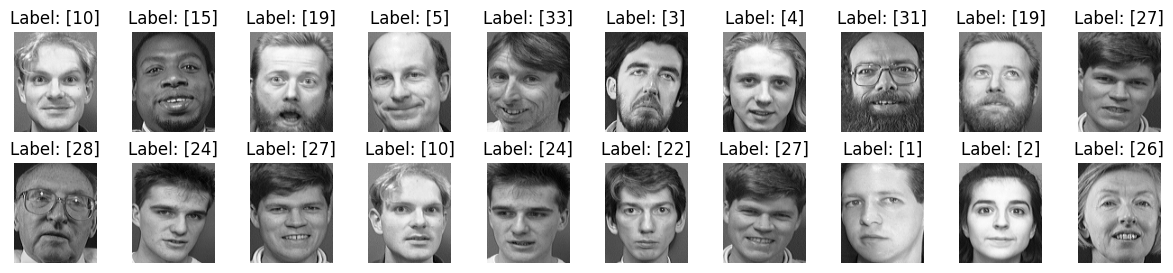

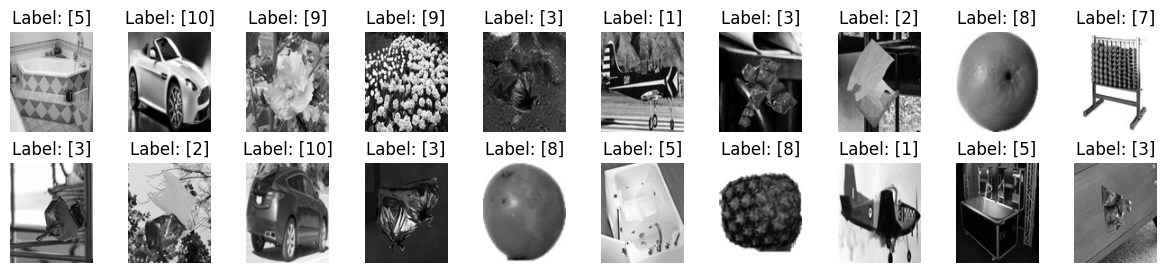

50% Train:  (400, 10304) (400, 1)
50% Test:  (400, 10304) (400, 1)


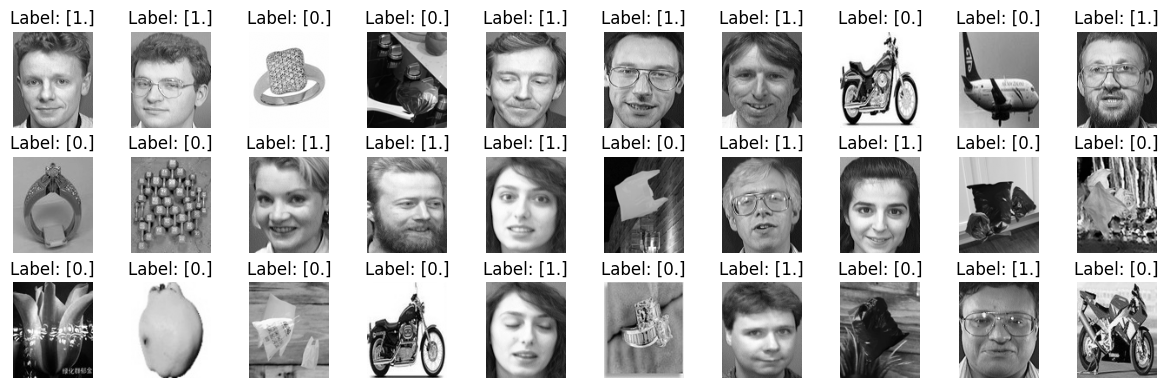

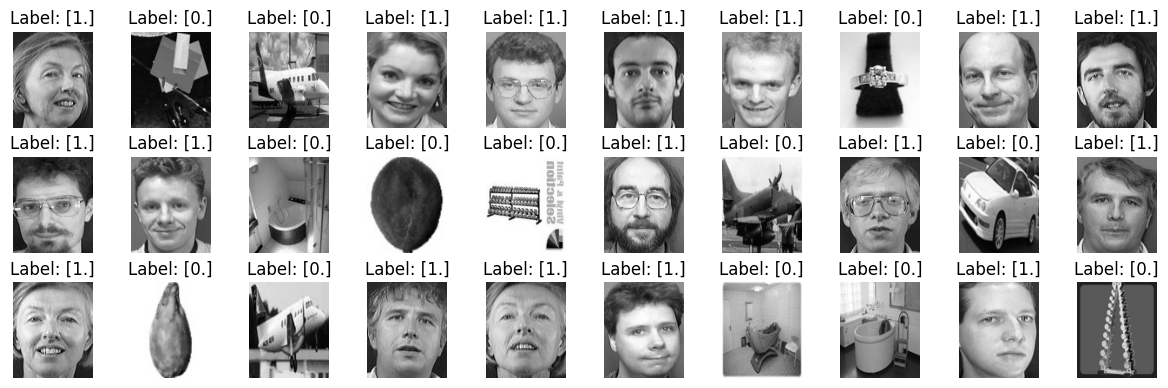

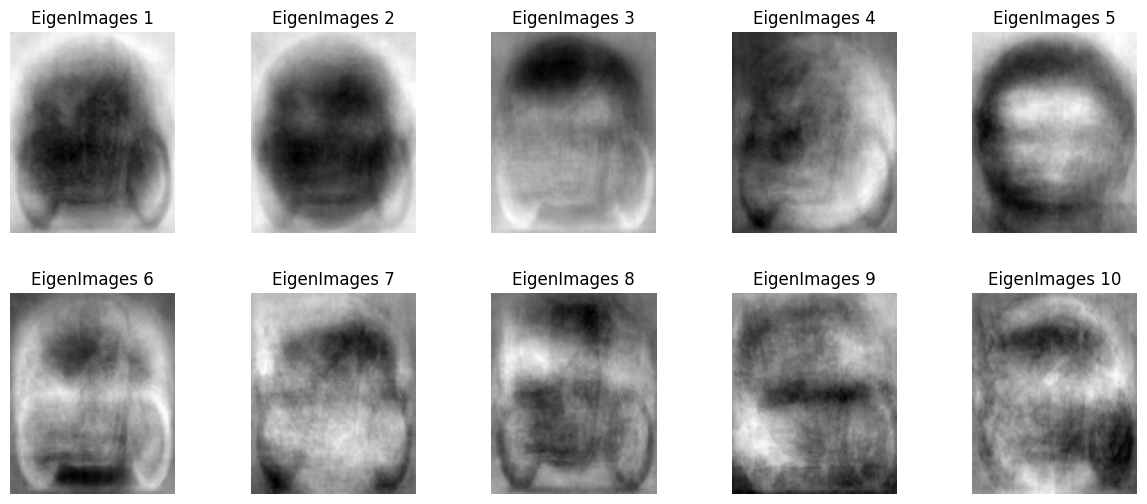

Accuracy of KNN classifier with k=1: 0.9225
Number of dominant eigenvectors used for LDA: 1
Accuracy of KNN classifier with k=1 after LDA: 0.765


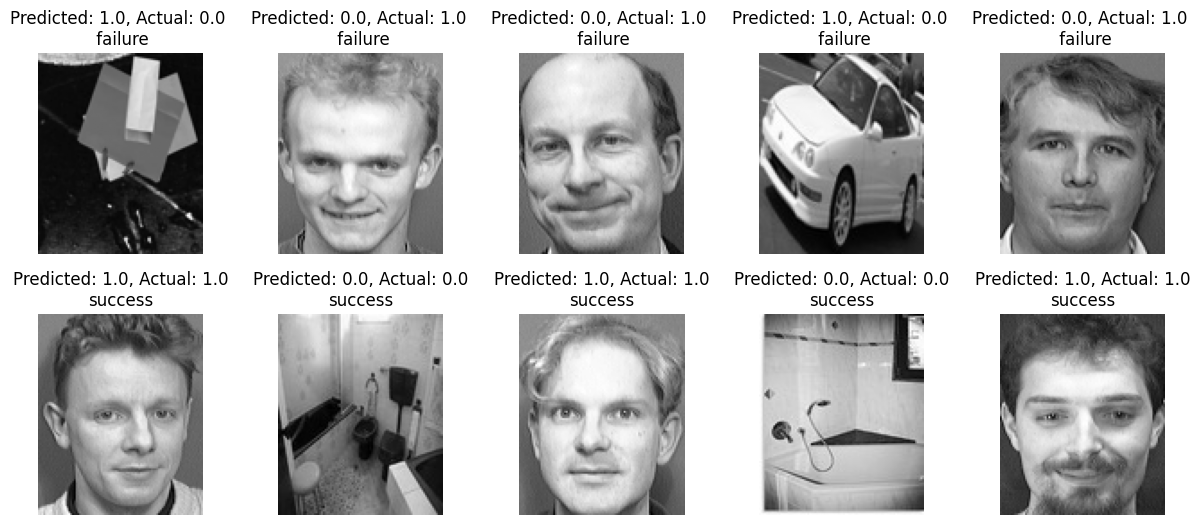

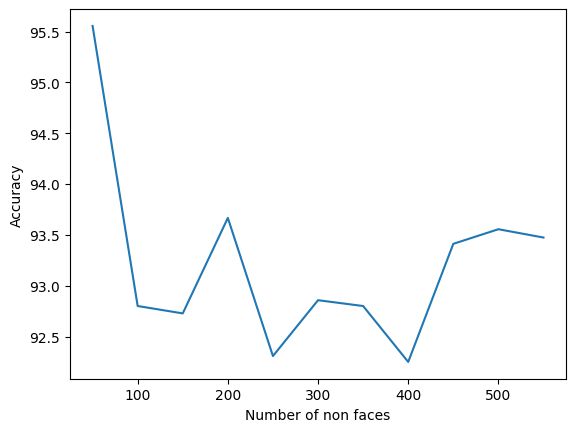

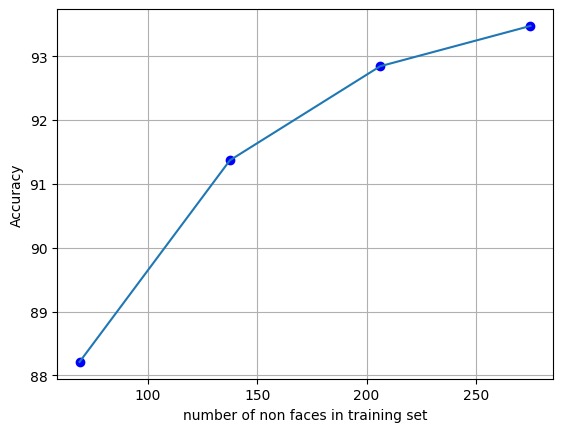

Accuracy of KNN classifier with k=1 after PCA with alpha=0.7: 0.975
Accuracy of KNN classifier with k=1 after PCA with alpha=0.5: 0.9225


In [17]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from pca import PCA
from lda import LDA2

'''
1) Non-Face Images
load non faces images (550), convert into gray scale
and resize each image to 92x112 pixels
then flatten to a 1D array.
2) Face Images
load faces images (400) and flatten to a 1D array.
'''
def load_images(path):
    images = []
    labels = []
    #nonfaces --> change to greyscal , resize and flatten
    if "non" in path:
        for i, dir in enumerate(os.listdir(path)):
            for file in os.listdir(os.path.join(path, dir)):
                img = Image.open(os.path.join(path, dir, file)).convert('L')
                img = img.resize((92,112))
                images.append(np.array(img).flatten())
                labels.append(i+1)
            
    #faces --> flatten
    else:
        for i, dir in enumerate(os.listdir(path)):
            for file in os.listdir(os.path.join(path, dir)):
                img = Image.open(os.path.join(path, dir, file))
                images.append(np.array(img).flatten())
                labels.append(i+1)
    return np.array(images), np.array(labels).reshape(-1,1)

faces, labels = load_images('Data')
non_faces, non_labels = load_images('nonfaces')

'''
binary labels --> 1 for faces, 0 for non-faces
'''
faces_labels = np.ones((len(faces),1))
non_faces_labels = np.zeros((len(non_faces),1))
print("Faces= ",faces.shape, faces_labels.shape)
print("NonFaces= ",non_faces.shape, non_faces_labels.shape)


'''
shuffle face images and thier labels
shuffle non_faces images and thier labels
to prevent the model from learning any unaccurate patterns based on the order of the samples
'''
def shuffle_data(data, labels):
    idx = np.arange(data.shape[0])
    np.random.shuffle(idx)
    return data[idx], labels[idx]

faces, labels = shuffle_data(faces, labels)
non_faces, non_labels = shuffle_data(non_faces, non_labels)

'''
visualize a subset of face and non-face images along with their corresponding labels after shuffling
'''
def plot_data(faces, labels, n=100):
    num_rows = n // 10 #10 columns
    fig, axs = plt.subplots(num_rows, 10, figsize=(15, 1.5 * num_rows), gridspec_kw={'hspace': 0.3})
    axs = axs.ravel()
    for i in range(n):
        axs[i].imshow(faces[i].reshape((112, 92)), cmap="gray")
        axs[i].set_title(f"Label: {labels[i]}")
        axs[i].axis("off")
    plt.show()

plot_data(faces, labels,20) #show 20 images
plot_data(non_faces, non_labels,20)

'''
Split the data into training and testing sets then combine face and non-face data.
'''
# function to split the data into training and testing which alpha is the percentage of the training data
def split_data(faces, faces_labels, non_faces, non_faces_labels, non_faces_count, alpha, non_face_precentage_in_train=1):
    if alpha == 0.5:
        faces_train = faces[::2]
        faces_train_labels = faces_labels[::2]
        faces_test = faces[1::2]
        faces_test_labels = faces_labels[1::2]

        non_faces_train = non_faces[:int(non_faces_count*non_face_precentage_in_train):2]
        non_faces_train_labels = non_faces_labels[:int(non_faces_count*non_face_precentage_in_train):2]
        
        non_faces_test = non_faces[1:non_faces_count:2]
        non_faces_test_labels = non_faces_labels[1:non_faces_count:2]
    else:
        n = len(faces) #400 faces
        n_train = int(n*alpha) #no. faces in train 
        idx = np.random.permutation(n) #random index (400)
        train_idx = idx[:n_train] #select first (n_train) index
        test_idx = idx[n_train:] #select the remaining elements
        faces_train = faces[train_idx]
        faces_train_labels = faces_labels[train_idx]
        faces_test = faces[test_idx]
        faces_test_labels = faces_labels[test_idx]
        
        n = non_faces_count
        n_train = int(n*alpha) #no. nonfaces in train 
        idx = np.random.permutation(n)
        train_idx = idx[:n_train]
        test_idx = idx[n_train:]
        non_faces_train = non_faces[train_idx]
        non_faces_train_labels = non_faces_labels[train_idx]
        non_faces_test = non_faces[test_idx]
        non_faces_test_labels = non_faces_labels[test_idx]
    
    return np.append(faces_train, non_faces_train, axis=0), np.append(faces_train_labels, non_faces_train_labels, axis=0), np.append(faces_test, non_faces_test, axis=0), np.append(faces_test_labels, non_faces_test_labels, axis=0)

train_data, train_labels, test_data, test_labels = split_data(faces, faces_labels, non_faces, non_faces_labels,400 , 0.5, 1)
print("50% Train: ",train_data.shape, train_labels.shape)
print("50% Test: ",test_data.shape, test_labels.shape)
#shuffle train and test images with their labels
train_data, train_labels = shuffle_data( train_data,train_labels)
test_data, test_labels = shuffle_data( test_data,  test_labels)
#display 30 images of train and test data
plot_data(train_data, train_labels,30)
plot_data(test_data, test_labels,30)

'''PCA
Explored the variance explained by different components.
Transformed training and testing data using the selected number of components.
'''

mean, space, projected_data= PCA(train_data,0.85)
train_projected = (train_data - mean) @ space
test_projected = (test_data - mean) @ space

#plot eigen faces
def plot_eigenfaces(eigenvectors, n=10):
    num_rows = n // 5
    _, axs = plt.subplots(num_rows, 5, figsize=(15, 3 * num_rows), gridspec_kw={'hspace': 0.3})
    axs = axs.ravel()
    for i in range(n):
        axs[i].imshow(eigenvectors[:, i].reshape((112, 92)), cmap="gray")
        axs[i].set_title(f"EigenImages {i+1}")
        axs[i].axis("off")
    plt.show()
plot_eigenfaces(space, 10)

'''
KNN 
'''
def knn_classifier(train_data, train_labels, test_data, test_labels, k=1):
    knn = KNeighborsClassifier( n_neighbors=1, weights='distance')
    knn.fit( train_data, train_labels.ravel() )
    return accuracy_score(test_labels, knn.predict(test_data).ravel()), knn.predict(test_data).ravel()

print("Accuracy of KNN classifier with k=1:", knn_classifier(train_projected, train_labels, test_projected, test_labels, 1)[0])


# Compute the number of unique classes
num_classes = len(np.unique(train_labels))

# Determine the number of dominant eigenvectors for LDA
'''
the number of dominant eigenvectors used in LDA corresponds to the number of classes minus one,
 or the minimum between the number of classes and the dimensionality of the feature space.
'''
num_eigenvectors_lda = min(num_classes - 1, train_data.shape[1])  # Number of features can also be used instead of train_data.shape[1]

print("Number of dominant eigenvectors used for LDA:", num_eigenvectors_lda)

lda_space = LDA2(train_data, train_labels)
train_lda_projected = np.dot(train_data, lda_space) # project train
test_lda_projected = np.dot(test_data, lda_space) # project test
print("Accuracy of KNN classifier with k=1 after LDA:", knn_classifier(train_lda_projected, train_labels, test_lda_projected, test_labels)[0])

'''
Show failure and success 
'''
def plot_failure_and_success(data, labels, predictions, n=10):
    failure_idx = np.where(predictions != labels)[1]
    success_idx = np.where(predictions == labels)[1]
    num_rows = n // 5
    fig, axs = plt.subplots(num_rows, 5, figsize=(15, 3 * num_rows), gridspec_kw={'hspace': 0.3})
    axs = axs.ravel()

    for i in range(n):
        if i < n/2:
            axs[i].imshow(data[failure_idx[i]].reshape((112, 92)), cmap="gray")
            axs[i].set_title(f"Predicted: {predictions[failure_idx[i]]}, Actual: {labels[0,failure_idx[i]]} \n failure")
        else:
            axs[i].imshow(data[success_idx[i-len(failure_idx)]].reshape((112, 92)), cmap="gray")
            axs[i].set_title(f"Predicted: {predictions[success_idx[i-len(failure_idx)]]}, Actual: {labels[0,success_idx[i-len(failure_idx)]]}\nsuccess")
        axs[i].axis("off")
    plt.show()

plot_failure_and_success(test_data, test_labels.reshape(1,-1), knn_classifier(train_lda_projected, train_labels, test_lda_projected, test_labels, 1)[1], 10)   



'''
project train and test data


def project_data(data, eigenvectors, mean,):
    return np.dot(data - mean, eigenvectors)
'''

'''
 the accuracy vs the number of non-faces images while fixing the number of face images
'''
def plot_acc_vs_non_faces(algorithm, faces, faces_labels, non_faces, non_faces_labels, steps=50):
    acc = []
    n = len(non_faces)
    for i in range(steps, n+steps, steps):
        train_data, train_labels, test_data, test_labels = split_data(faces, faces_labels, non_faces, non_faces_labels, i, 0.5, 1)
        train_data, train_labels = shuffle_data(train_data, train_labels)
        test_data, test_labels = shuffle_data(test_data, test_labels)
        
        if algorithm == 0:
            mean, space, projected_data = PCA(train_data, 0.85)
            train_projected = (train_data - mean) @ space
            test_projected = (test_data - mean) @ space
            acc.append(knn_classifier(train_projected, train_labels, test_projected, test_labels, 1)[0]*100)
        else:
            lda_space = LDA2(train_data, train_labels)
            train_lda_projected = np.dot(train_data, lda_space)
            test_lda_projected = np.dot(test_data, lda_space)
            acc.append(knn_classifier(train_lda_projected, train_labels, test_lda_projected, test_labels, 1)[0]*100)

    plt.plot(range(steps, n+steps, steps), acc)
    plt.xlabel("Number of non faces")
    plt.ylabel("Accuracy")
    plt.show()

plot_acc_vs_non_faces(0,faces,faces_labels, non_faces,non_faces_labels,steps=50)


'''
Criticize the accuracy measure for large numbers of non-faces images in the training data
'''
def acc_vs_non_faces_in_training(algorithm, faces, faces_labels, non_faces, non_faces_labels, step=4):
    acc = []
    n = len(non_faces)
    steps=np.linspace(step/step**2,1,step)
    for i in steps:
        if algorithm==0:
            train_data, train_labels, test_data, test_labels = split_data(faces, faces_labels, non_faces, non_faces_labels, n, 0.5, i)
            train_data, train_labels = shuffle_data(train_data, train_labels)
            test_data, test_labels = shuffle_data(test_data, test_labels)
            mean, space, projected_data= PCA(train_data,0.85)
            train_projected = (train_data - mean) @ space
            test_projected = (test_data - mean) @ space
            acc.append(knn_classifier(train_projected, train_labels, test_projected, test_labels, 1)[0]*100)
        else:
            train_data, train_labels, test_data, test_labels = split_data(faces, faces_labels, non_faces, non_faces_labels, n, 0.5, i)
            train_data, train_labels = shuffle_data(train_data, train_labels)
            test_data, test_labels = shuffle_data(test_data, test_labels)
            lda_space = LDA2(train_data, train_labels)
            train_lda_projected = np.dot(train_data, lda_space)
            test_lda_projected = np.dot(test_data, lda_space)
            acc.append(knn_classifier(train_lda_projected, train_labels, test_lda_projected, test_labels, 1)[0]*100)
        

    # plot the points of the accuracy curve
    plt.plot(steps*(n//2), acc)
    plt.scatter(steps*(n//2), acc,marker='o',color='b')
    plt.grid()
    plt.xlabel("number of non faces in training set")
    plt.ylabel("Accuracy")
    plt.show()

acc_vs_non_faces_in_training(0,faces, faces_labels, non_faces, non_faces_labels)


'''
Split the data into 70% training and 30% test, and compare the accuracy with 50% split
'''
train_data70, train_labels70, test_data70, test_labels70 = split_data(faces, faces_labels, non_faces, non_faces_labels, 400, 0.7, 1)
train_data50, train_labels50, test_data50, test_labels50 = split_data(faces, faces_labels, non_faces, non_faces_labels, 400, 0.5, 1)

train_data70, train_labels70 = shuffle_data(train_data70, train_labels70)
test_data70, test_labels70 = shuffle_data(test_data70, test_labels70)

train_data50, train_labels50 = shuffle_data(train_data50, train_labels50)
test_data50, test_labels50 = shuffle_data(test_data50, test_labels50)


mean70, space70, projected_data70= PCA(train_data70,0.85)
train_projected70 = (train_data70 - mean) @ space
test_projected70 = (test_data70 - mean) @ space

mean50, space50, projected_data50= PCA(train_data50,0.85)
train_projected50 = (train_data50 - mean) @ space
test_projected50 = (test_data50 - mean) @ space


acc70 = knn_classifier(train_projected70, train_labels70, test_projected70, test_labels70, 1)[0]
acc50 = knn_classifier(train_projected50, train_labels50, test_projected50, test_labels50, 1)[0]

print("Accuracy of KNN classifier with k=1 after PCA with alpha=0.7:", acc70)
print("Accuracy of KNN classifier with k=1 after PCA with alpha=0.5:", acc50)
